# 🌾 Crop Recommendation System

This notebook builds a machine learning model to recommend suitable crops based on soil and environmental parameters.

📘 This project was developed as a part of the UCS411 (Artificial Intelligence) course at **Thapar Institute of Engineering and Technology (TIET)** by the following students:

1. Divyam (102303445)
2. Ishan Satya Prakash (102303449)
3. Parul Garg (102303433)


---

### 📊 Input Features:

- **Temperature** (°C)
- **Humidity** (%)
- **Rainfall** (mm)
- **pH** (Soil pH)
- **Nitrogen** (N - kg/ha)
- **Phosphorous** (P - kg/ha)
- **Potassium** (K - kg/ha)
- **Carbon** (% or content level)
- **Soil Type** (Categorical: e.g., clay, sandy, loamy, etc.)

🎯 **Target Variable**: `Crop` – The most suitable crop for the given conditions.


## 🔍 Exploratory Data Analysis (EDA)
- The aim of this section is to explore and visualize patterns , relationship between variables and target

In [39]:
# importing necessary libraries
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # for fixing matplotlib LIB.DLL Issue
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [40]:
# Importing the data set
data = pd.read_csv("crop_recommendation_dataset.csv")
print(f"The length of dataset is {data.shape}")
print(data.info())
#print(data.describe())

The length of dataset is (3100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Humidity     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.3+ KB
None


In [41]:
# Also checking from above output we can differentiate numericals and label columns
numerical_features = ["Temperature","Humidity","Rainfall","PH","Nitrogen","Phosphorous","Potassium","Carbon"]
label_features = ["Soil","Crop"]
# Checking for Missing Values
data.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

There are no null values so moving into visualisations

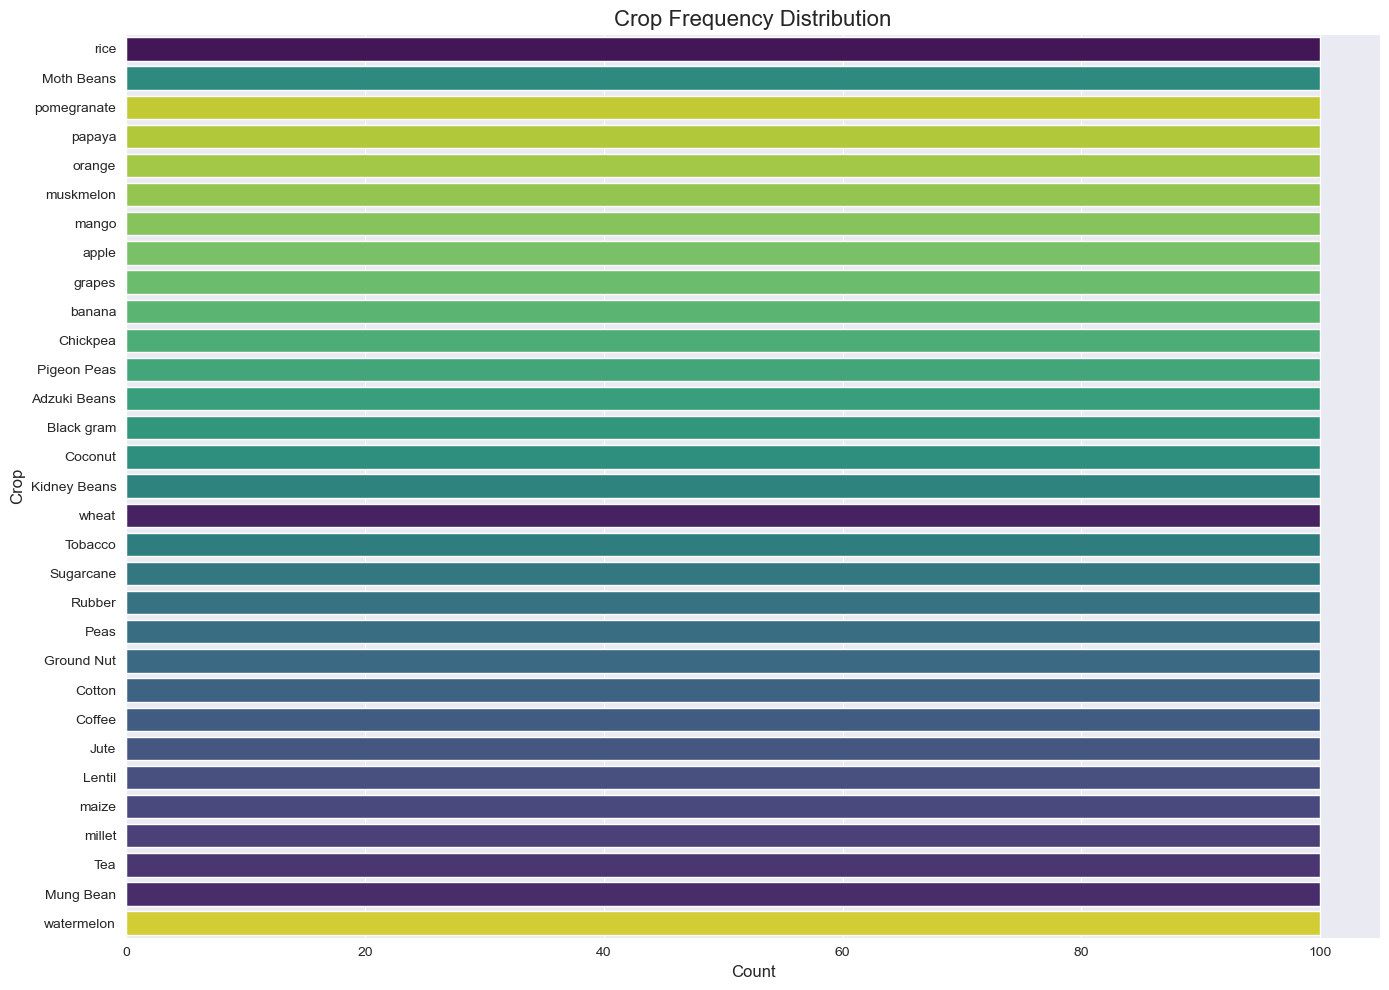

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  # Increase figure size
sns.countplot(y='Crop', data=data, order=data['Crop'].value_counts().index, palette='viridis',hue='Crop')

plt.title('Crop Frequency Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



The dataset is pretty balanced as it has exactly 100 samples of each class, Now Checking Pair plots of each sample

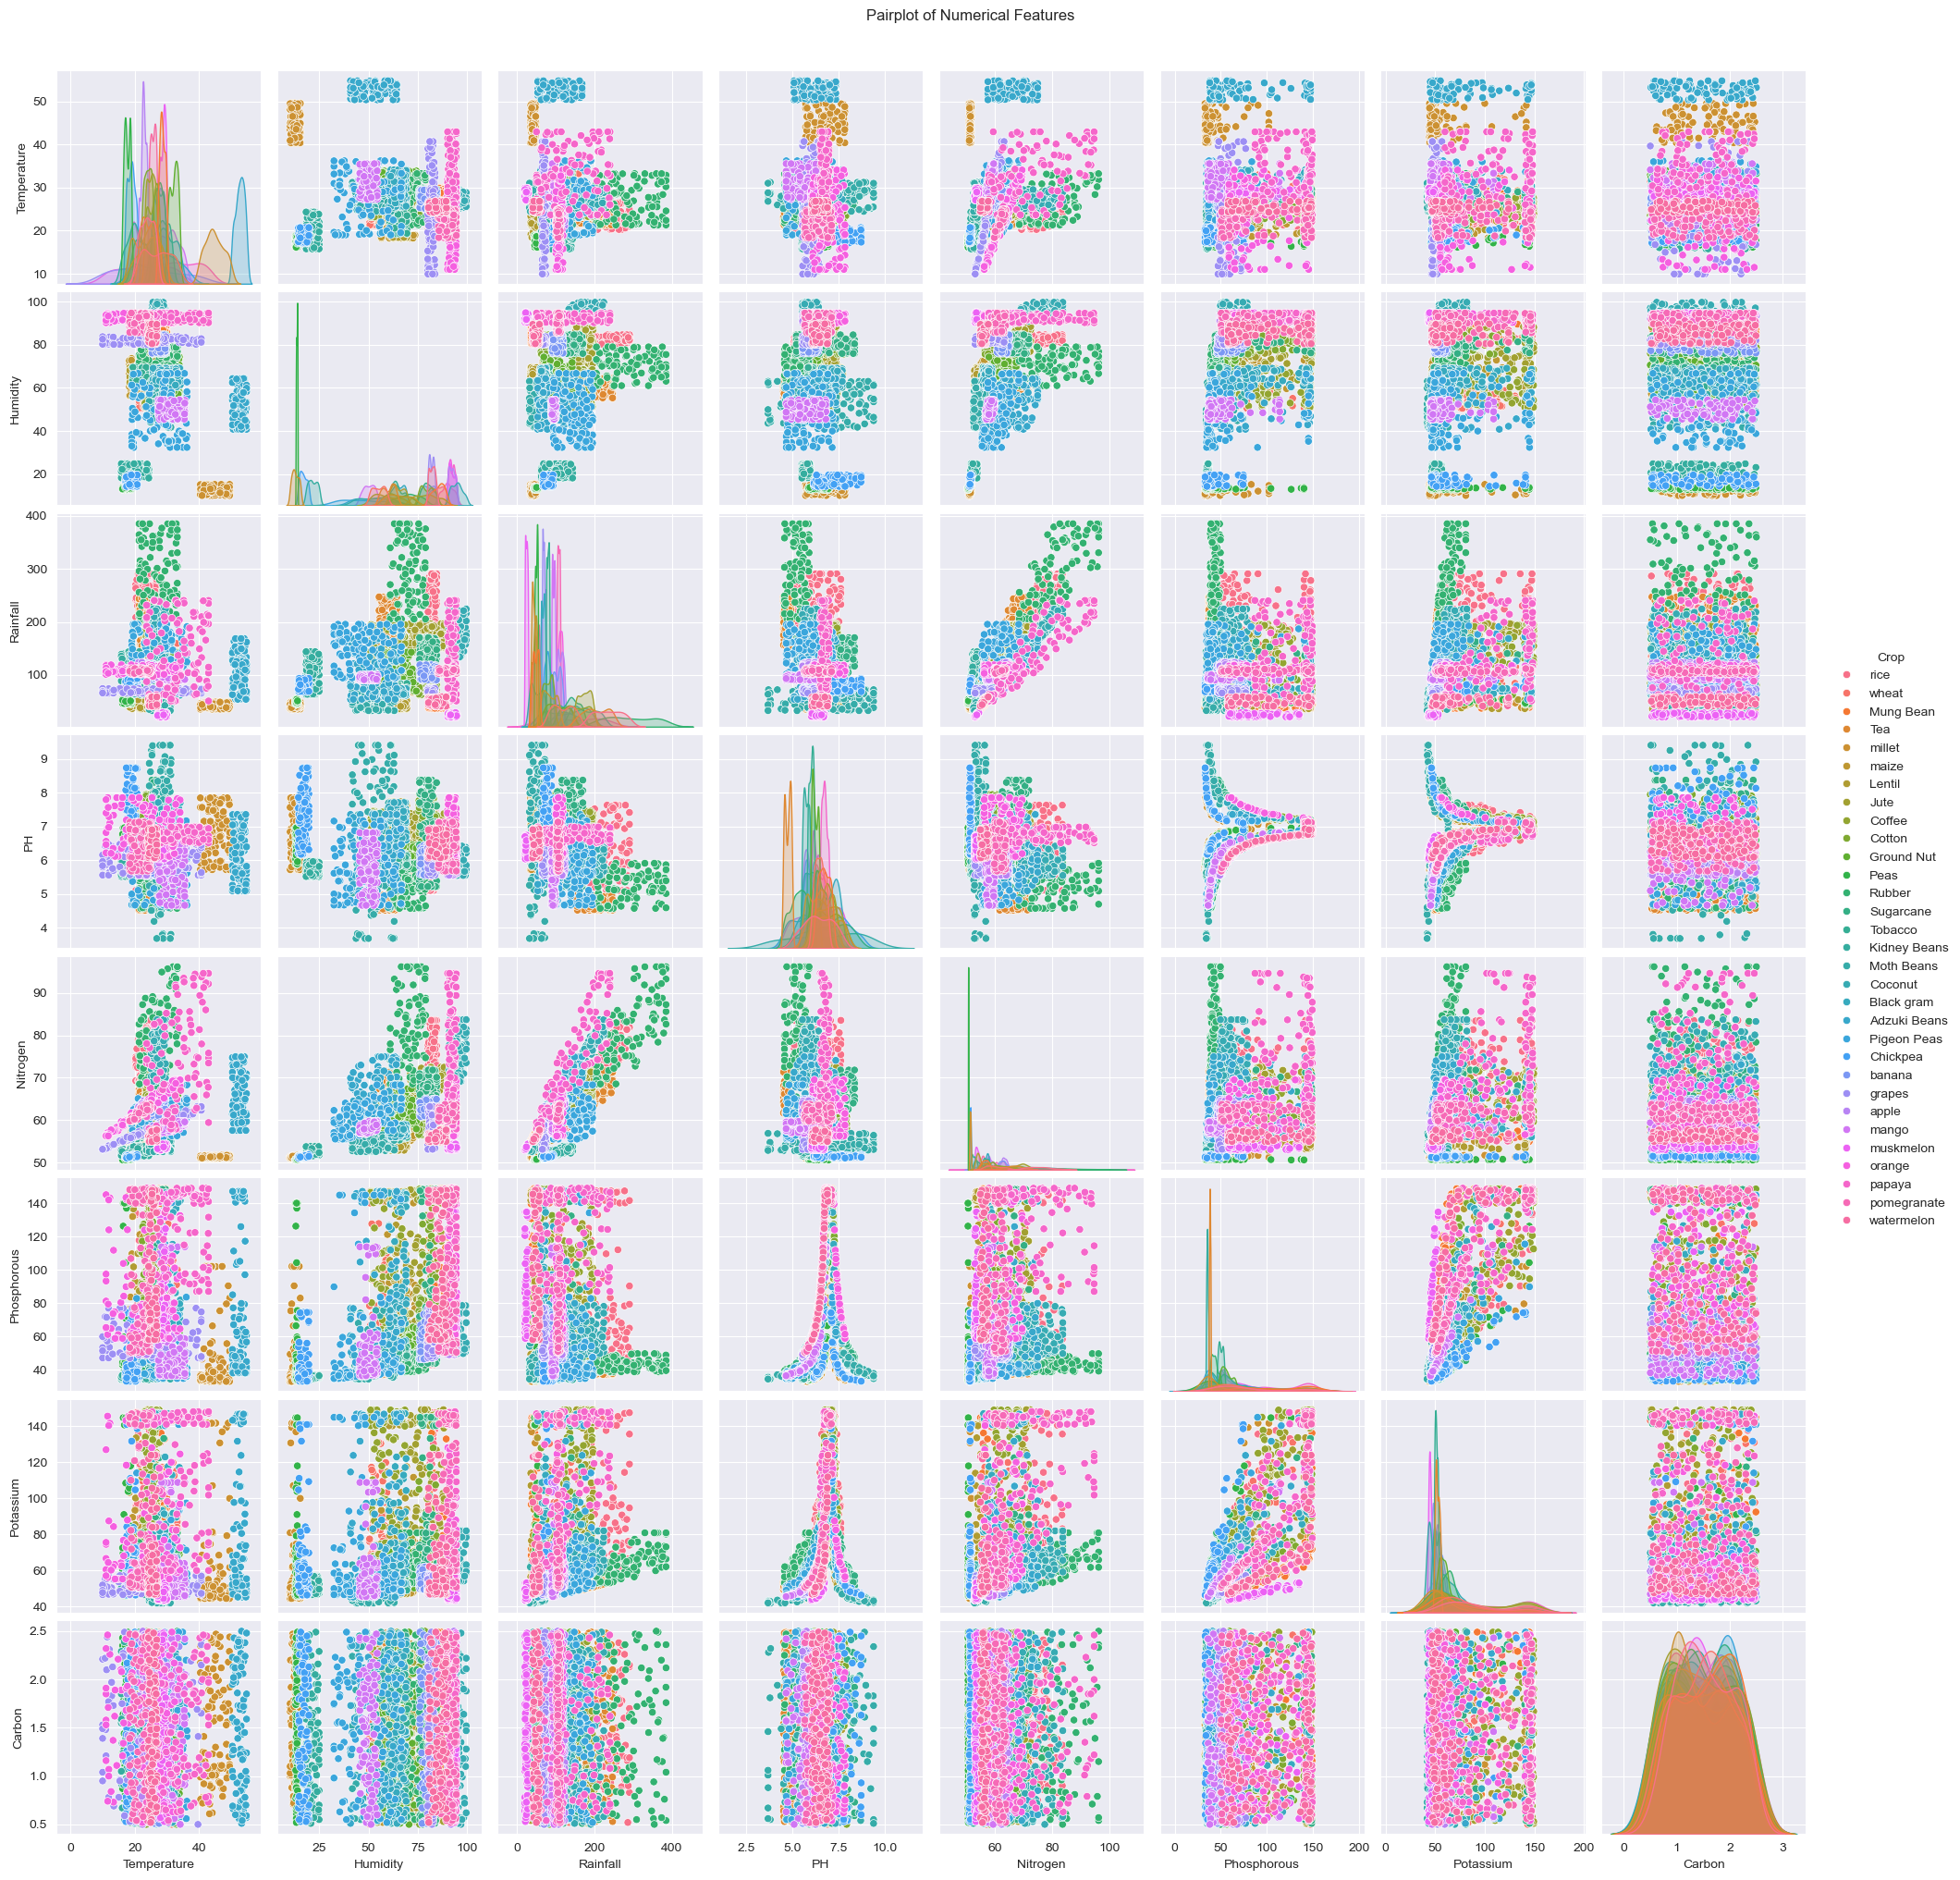

In [43]:
sns.pairplot(data,hue='Crop')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

We can see visually differences from color can be seen so there is a good chance models will eventually find proper decision boundaries

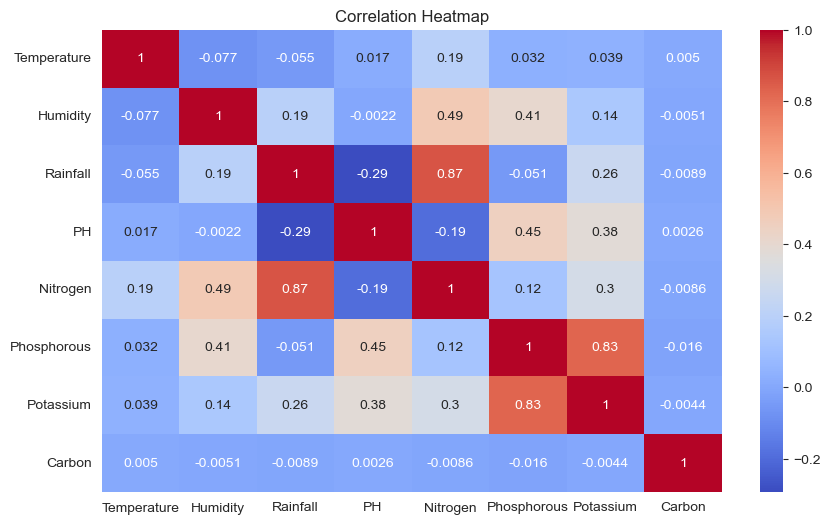

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(data[numerical_features].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

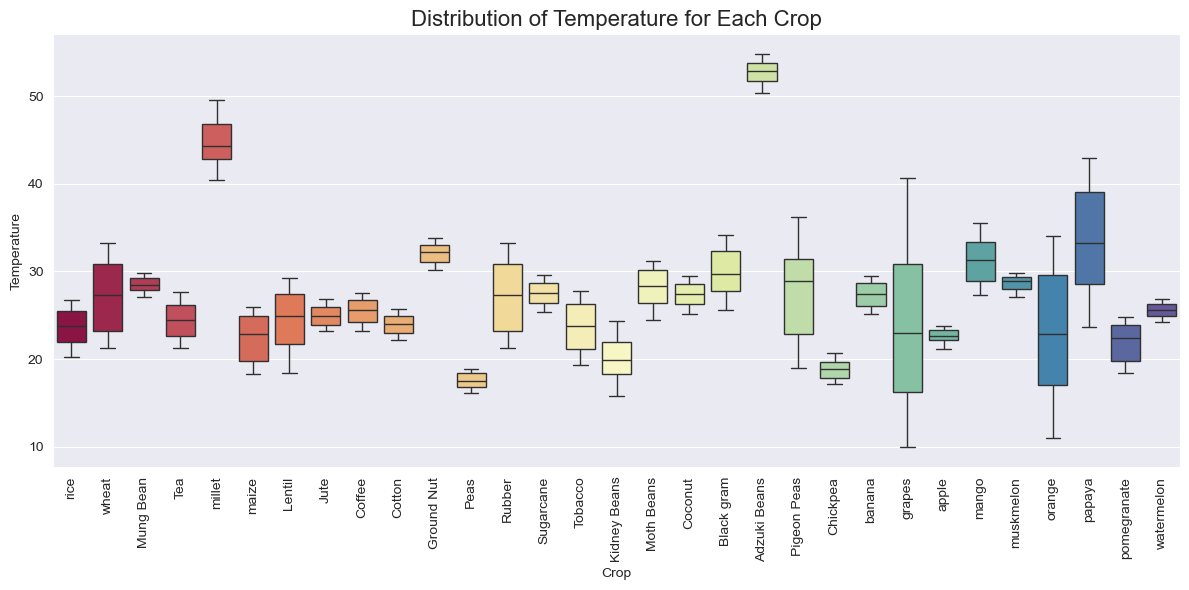

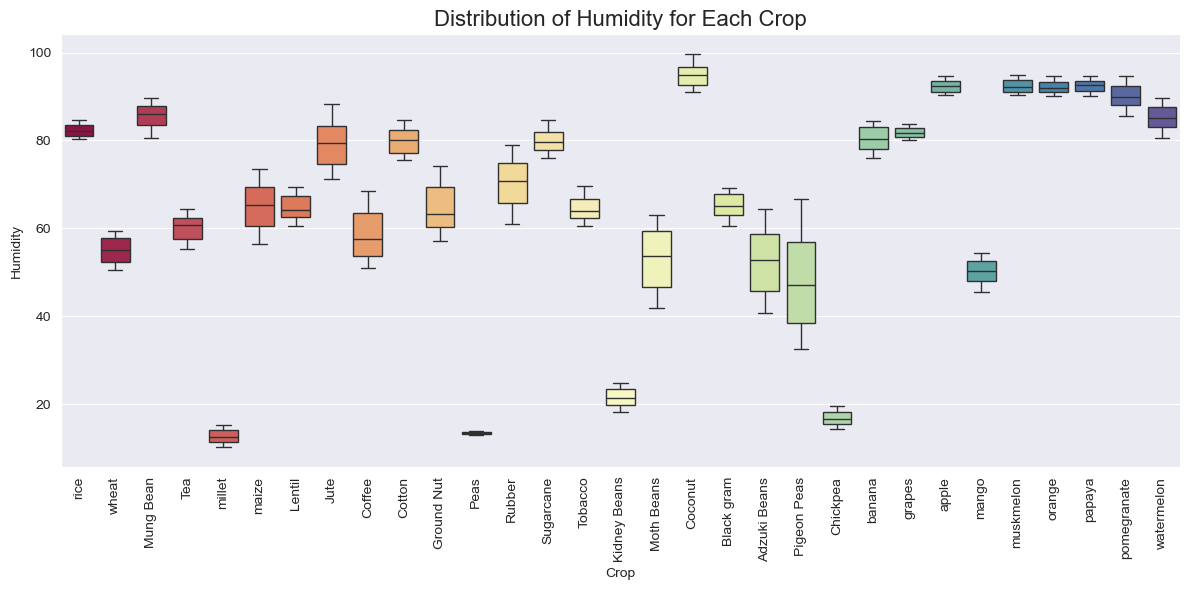

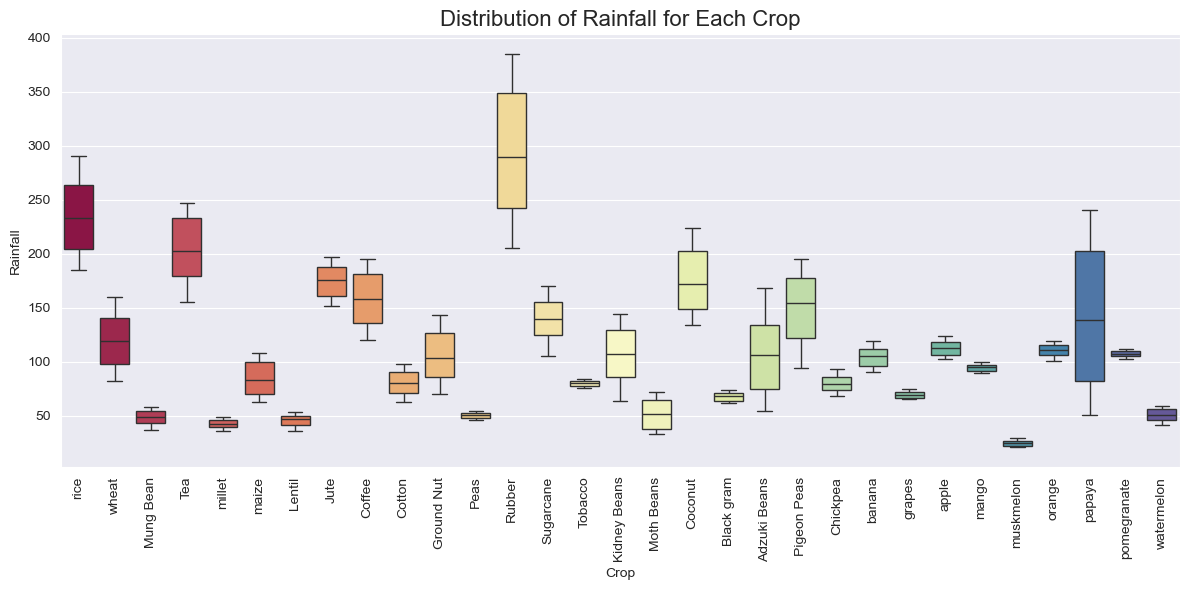

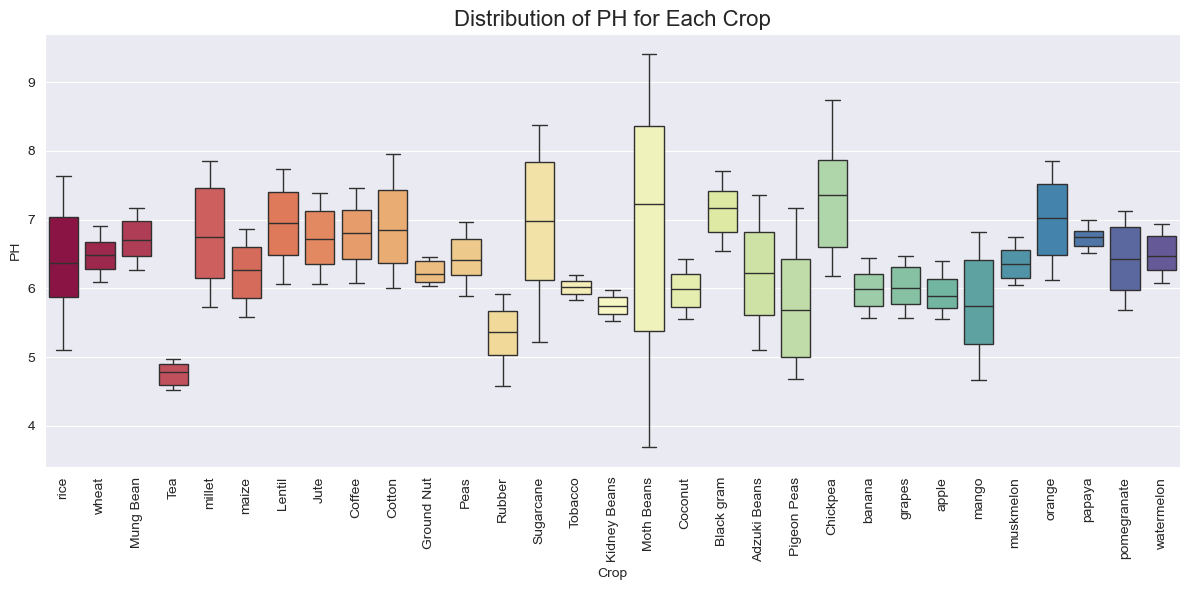

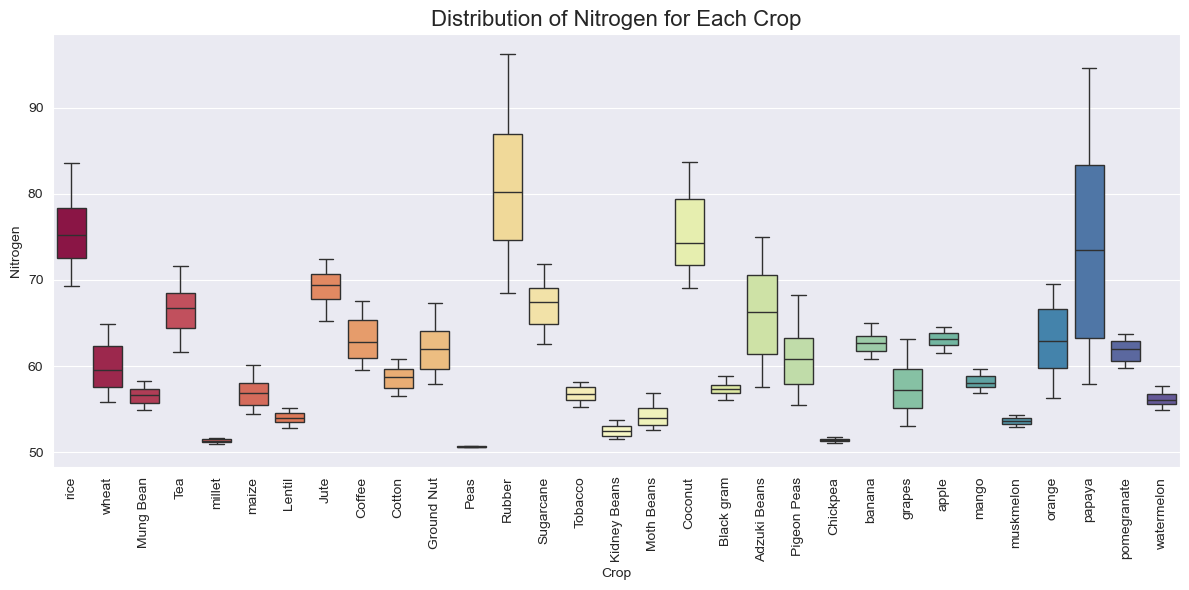

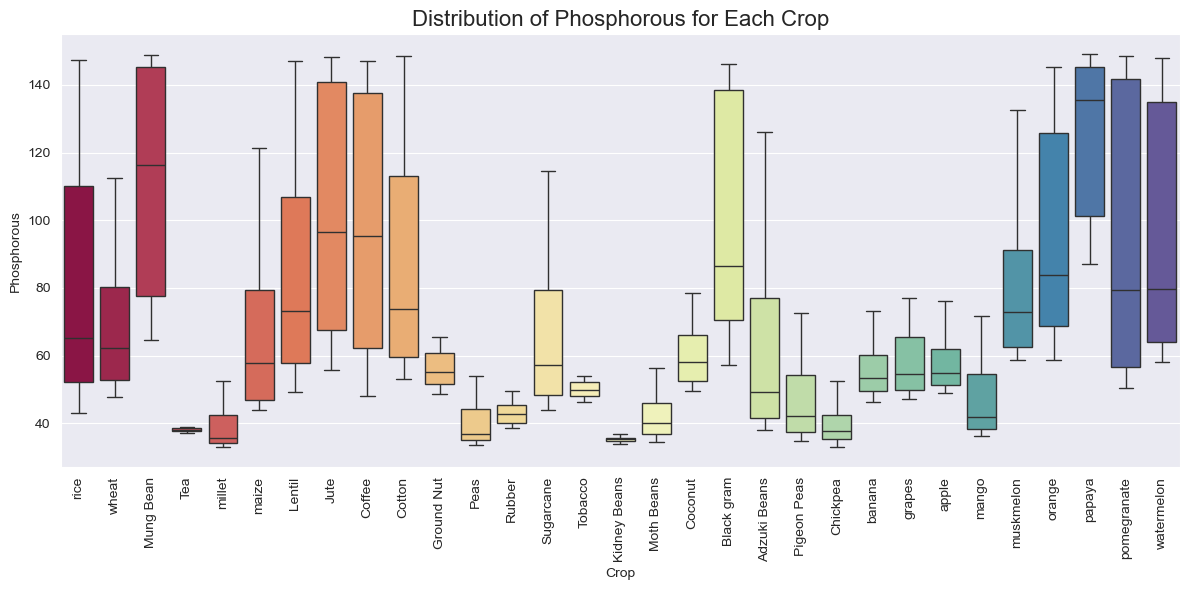

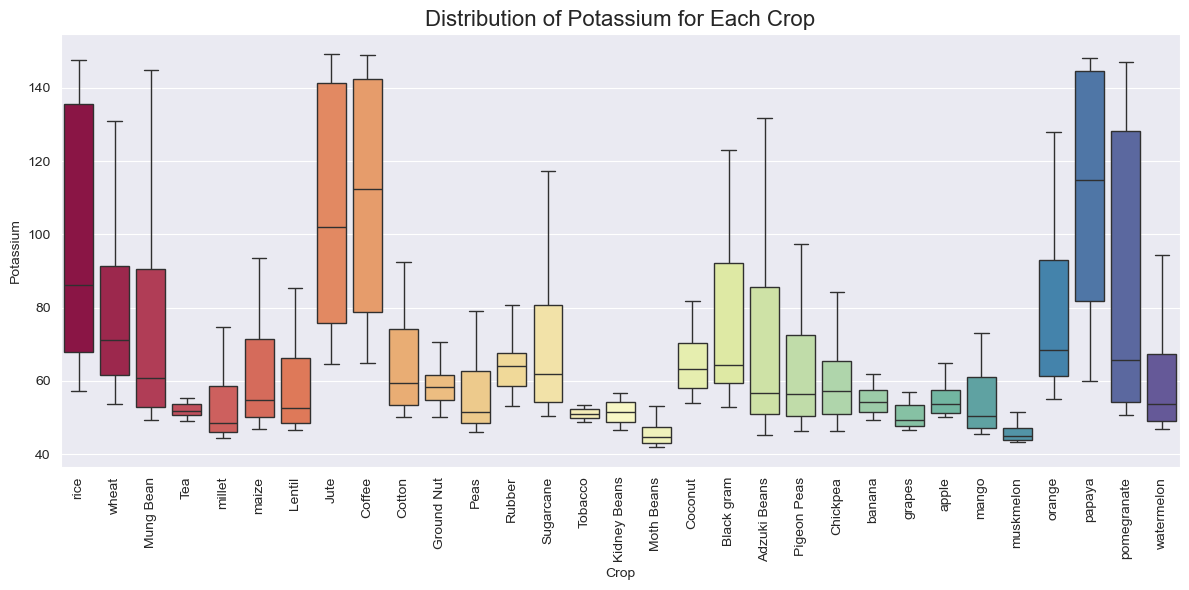

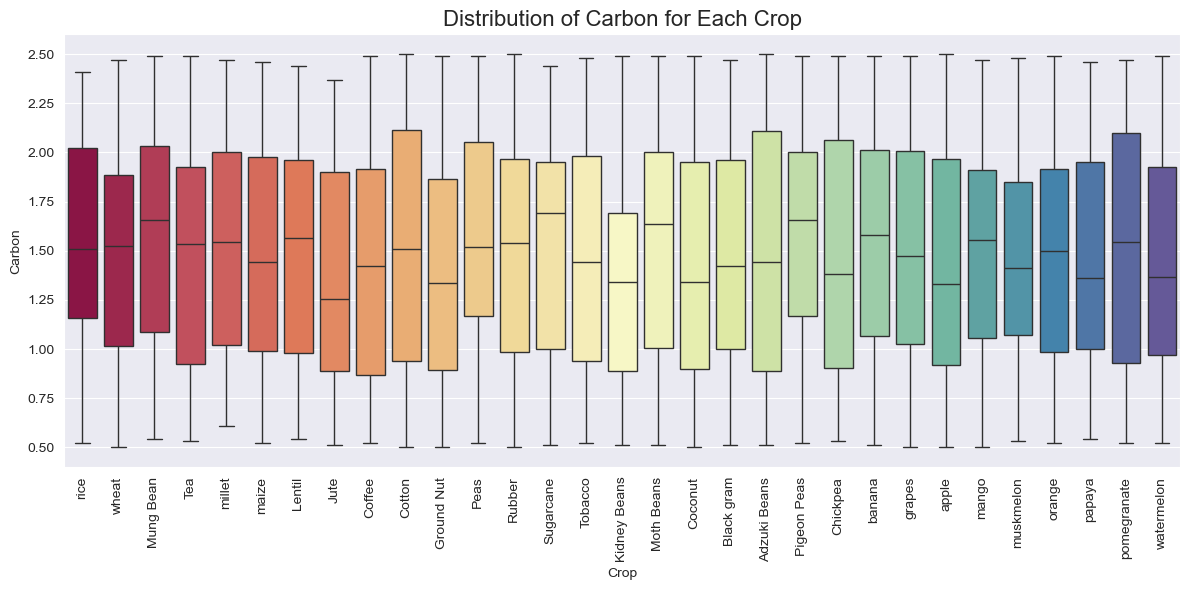

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a rainbow color palette using a continuous scale
rainbow_palette = sns.color_palette("Spectral", as_cmap=True)  # Spectral gives a good rainbow effect

# For each feature, plot a boxplot with rainbow colors
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Map 'Crop' to numbers for the color gradient
    hue_values = np.arange(len(data['Crop'].unique()))  # Creating a range for 'Crop' values

    sns.boxplot(x='Crop', y=feature, data=data,
                palette=list(rainbow_palette(hue_values / max(hue_values))),  # Normalize for gradient effect
                showfliers=False,hue='Crop')  # Optional: Hide outliers for a smoother effect

    plt.xticks(rotation=90)
    plt.title(f"Distribution of {feature} for Each Crop", fontsize=16)
    plt.tight_layout()
    plt.show()


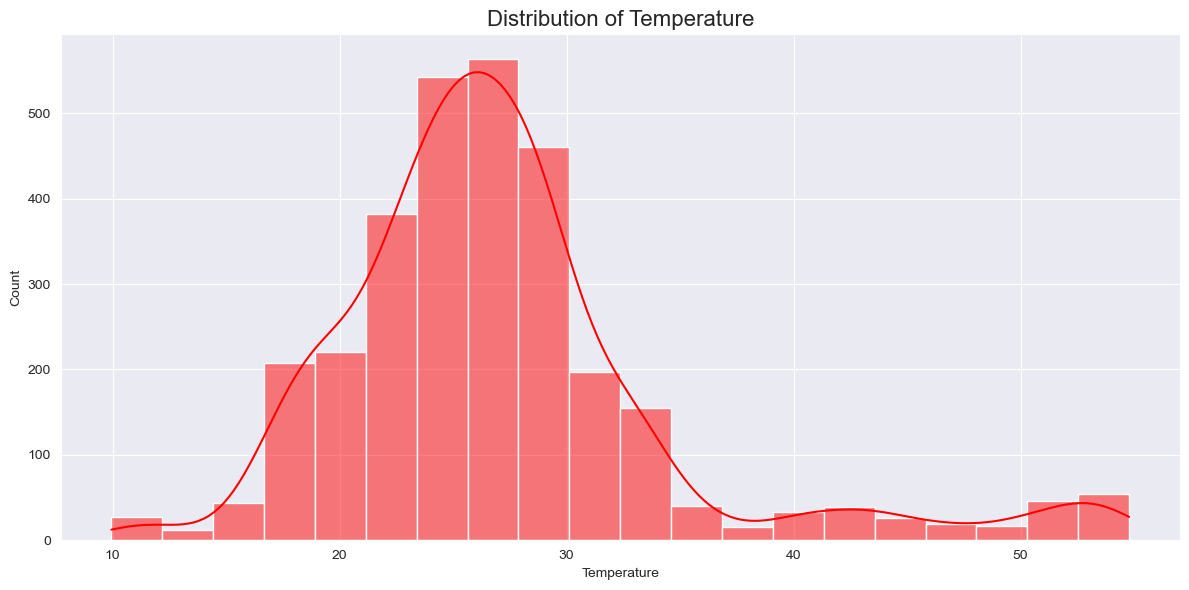

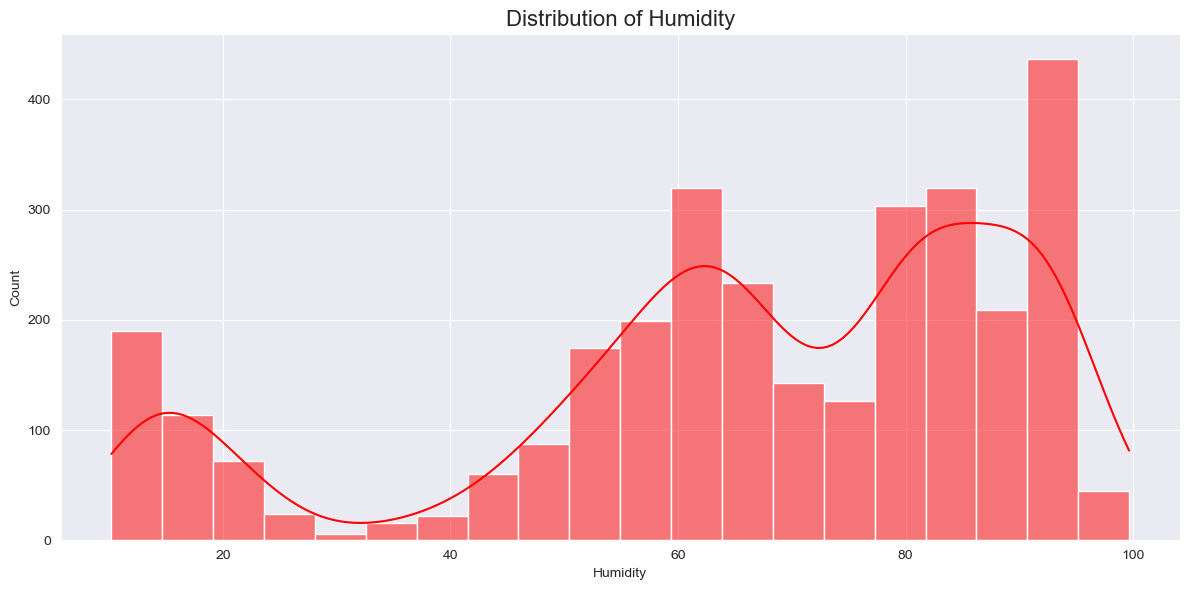

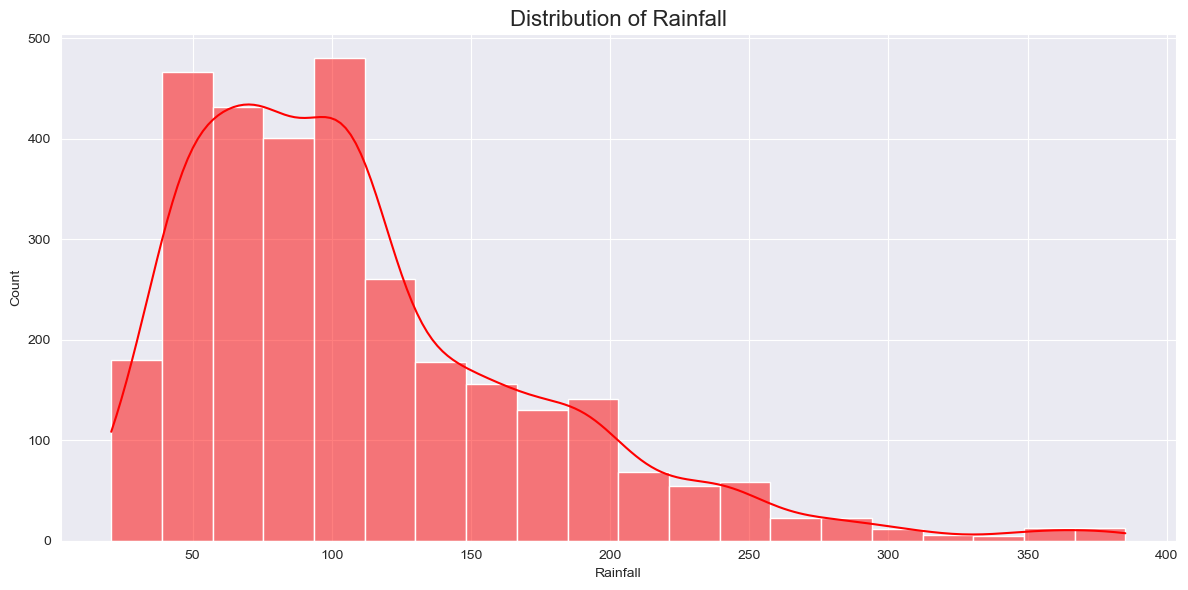

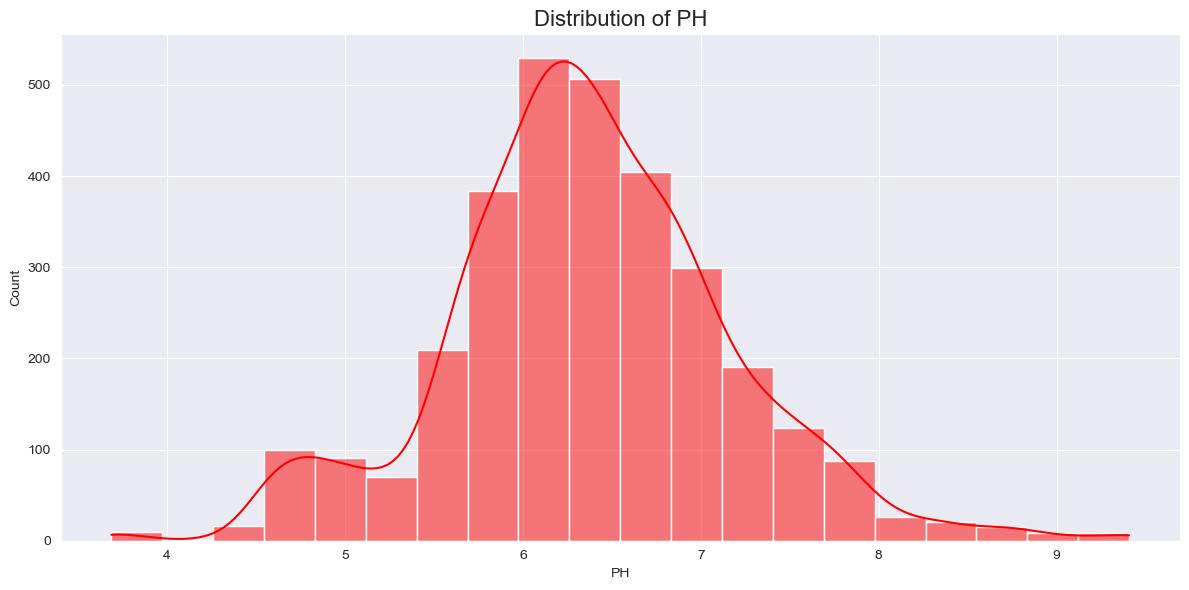

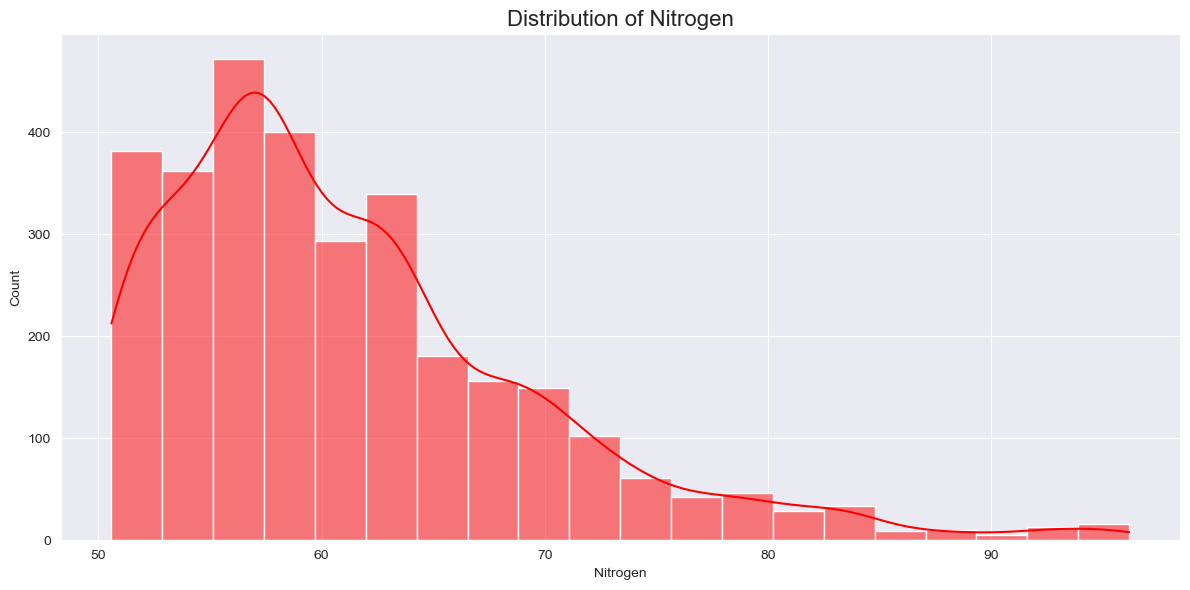

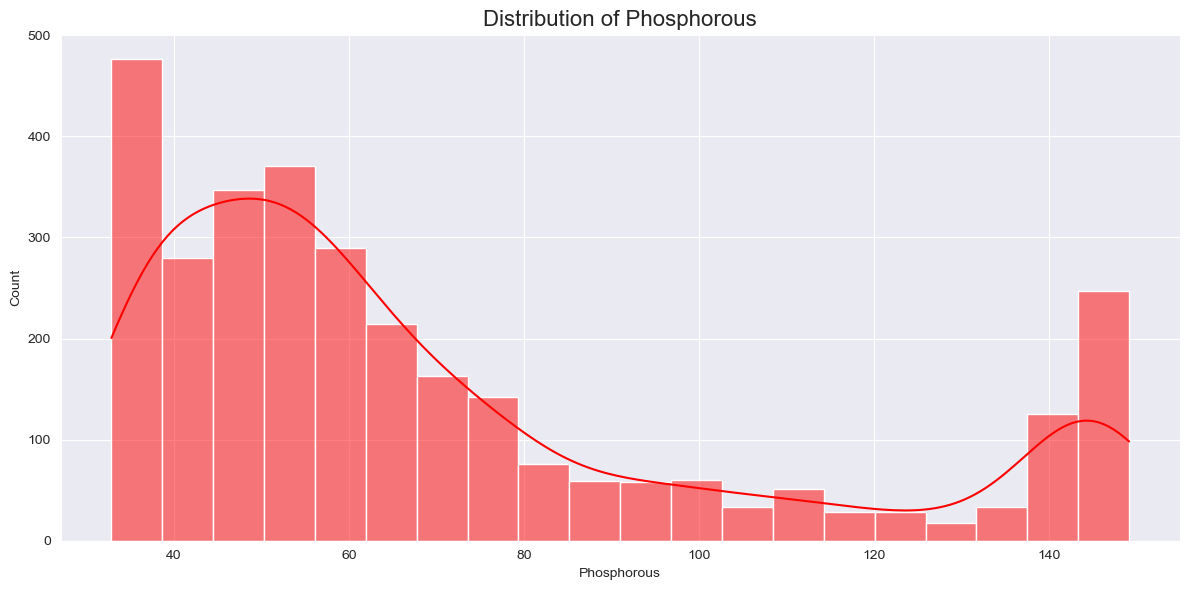

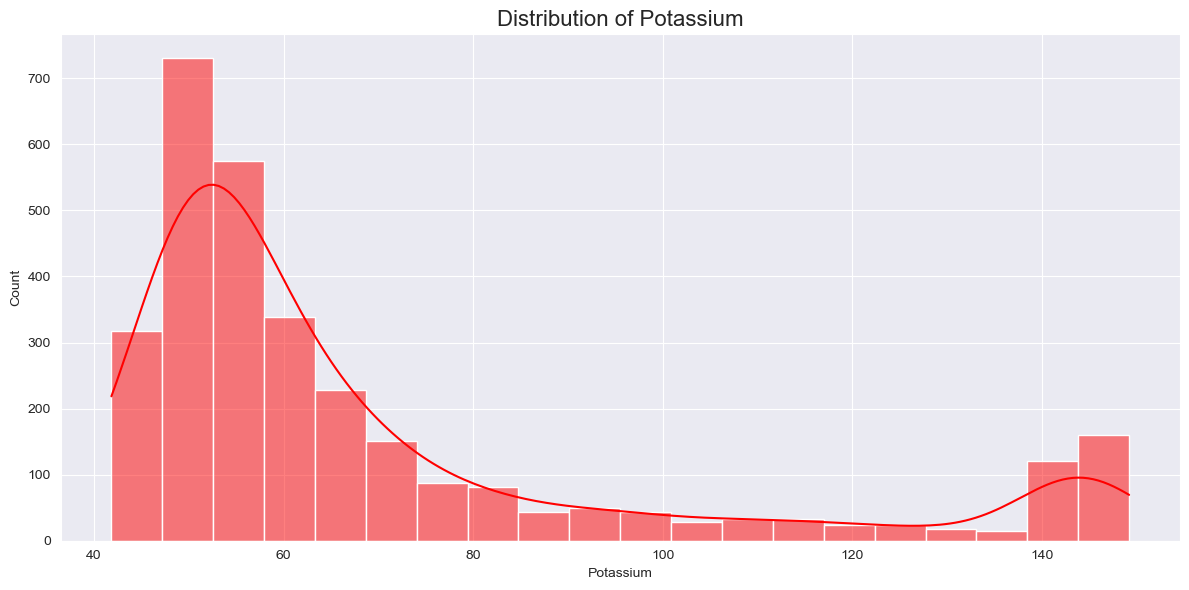

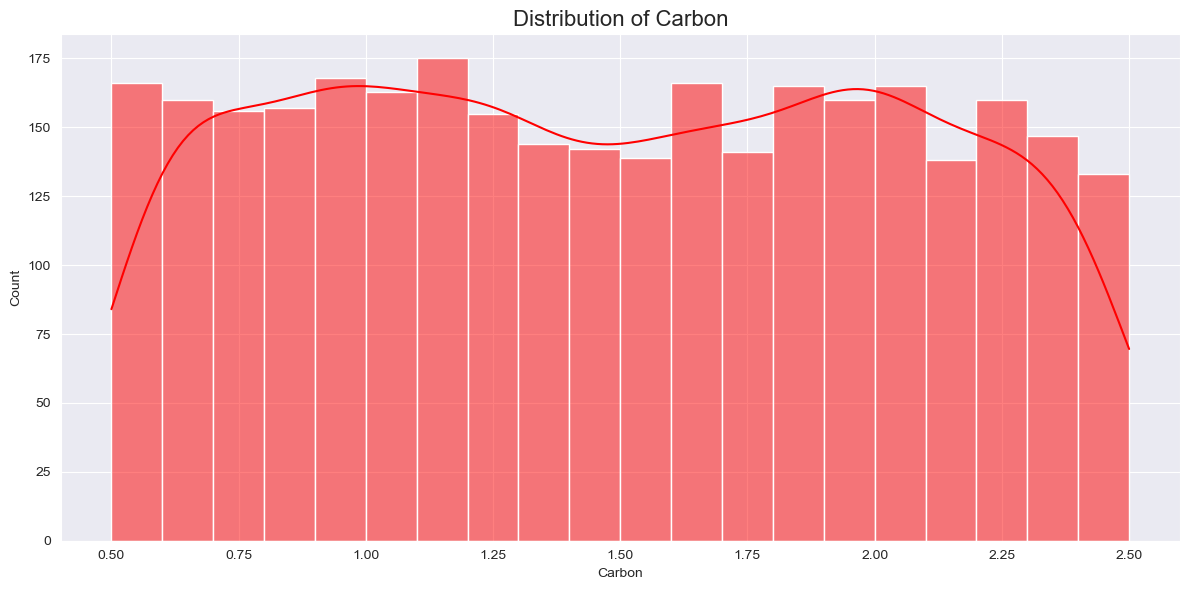

In [46]:
#Distribution of each Variable
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[feature], kde=True, color='red', bins=20)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.tight_layout()
    plt.show()


## 🔬Data Preprocessing
After performing extensive EDA, we can now proceed to make our data ready to be trained for our machine learning models
# 🔍 Key Preprocessing Steps:
1. Handling Missing Values - in this we have no missing values
2. Encoding Categorical Variables - We have 2 Categorical Variables Crop and Soil
3. Feature Scaling - We have 8 numerical features to scale

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
l_encoder = LabelEncoder()
o_encoder = OrdinalEncoder()
label_features = ["Soil","Crop"]
data["Crop"] = l_encoder.fit_transform(data["Crop"])
label_classes = l_encoder.classes_
data["Soil"] = o_encoder.fit_transform(data[["Soil"]])
# for idx,col in enumerate(label_features):
#     data[col] = encoder.fit_transform(data[col])
#     if col == "Crop":
#         label_classes = encoder.classes_
# # Checking dataset
print(label_classes)
data.head()

['Adzuki Beans' 'Black gram' 'Chickpea' 'Coconut' 'Coffee' 'Cotton'
 'Ground Nut' 'Jute' 'Kidney Beans' 'Lentil' 'Moth Beans' 'Mung Bean'
 'Peas' 'Pigeon Peas' 'Rubber' 'Sugarcane' 'Tea' 'Tobacco' 'apple'
 'banana' 'grapes' 'maize' 'mango' 'millet' 'muskmelon' 'orange' 'papaya'
 'pomegranate' 'rice' 'watermelon' 'wheat']


Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    141.82400   
2    23.004459  82.320763  263.964248  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    147.45895   
4    20.280071  81.604873  262.717340  7.628473     73.98     68.95000   

   Potassium  Carbon  Soil  Crop  
0    94.4400    0.63   2.0    28  
1   141.6978    1.40   2.0    28  
2    81.8900    1.80   4.0    28  
3   142.9430    1.43   2.0    28  
4    95.7400    1.75   4.0    28

In [24]:
numerical_features

['Temperature',
 'Humidity',
 'Rainfall',
 'PH',
 'Nitrogen',
 'Phosphorous',
 'Potassium',
 'Carbon']

In [48]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
numerical_features = ['Temperature',
                      'Humidity',
                      'Rainfall',
                      'PH',
                      'Nitrogen',
                      'Phosphorous',
                      'Potassium',
                      'Carbon']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

Temperature  Humidity  Rainfall        PH  Nitrogen  Phosphorous  \
0    -0.825185  0.666767  1.451432  0.167628  0.961069     0.266667   
1    -0.707117  0.596617  1.822729  0.835390  1.285242     2.052854   
2    -0.543548  0.680021  2.406735  1.578475  1.970533    -0.309679   
3    -0.081384  0.595116  2.076446  0.763392  2.075412     2.214350   
4    -0.904673  0.650184  2.387217  1.572118  1.518836    -0.035692   

   Potassium    Carbon  Soil  Crop  
0   0.844761 -1.469666   2.0    28  
1   2.448903 -0.135293   2.0    28  
2   0.418758  0.557887   4.0    28  
3   2.491171 -0.083305   2.0    28  
4   0.888889  0.471240   4.0    28

## 🧪 Now we can proceed to do train-test split and Model Building

### 1. 🔪 Split the Data

In [49]:
from sklearn.model_selection import train_test_split
X = data.drop('Crop',axis=1)
y = data.Crop
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
len(X_train),len(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2480, 9), (620, 9), (2480,), (620,))

In [50]:
# Defining model list
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}
models

{'Logistic Regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machine': SVC(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'Random Forest': RandomForestClassifier(random_state=42)}

In [51]:
from sklearn.metrics import accuracy_score, classification_report

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
    }
model_results

{'Logistic Regression': {'model': LogisticRegression(),
  'accuracy': 0.7548387096774194},
 'K-Nearest Neighbors': {'model': KNeighborsClassifier(),
  'accuracy': 0.7580645161290323},
 'Support Vector Machine': {'model': SVC(), 'accuracy': 0.7935483870967742},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
   

## 🔧 Hyperparameter Tuning: XGBoost & Random Forest


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

rf_random.fit(X_train, y_train)
print("Best RF Params:", rf_random.best_params_)
print("Best RF Accuracy:", rf_random.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best RF Accuracy: 0.9596774193548387


In [55]:
from xgboost import XGBClassifier


xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

xgb_random.fit(X_train, y_train)
print("Best XGB Params:", xgb_random.best_params_)
print("Best XGB Accuracy:", xgb_random.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGB Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.6}
Best XGB Accuracy: 0.9665322580645161


## 💾 Saving the Best Model in pickle

In [63]:
import pickle

# Get the best XGBoost model from RandomizedSearchCV
best_model = xgb_random

# Save the best XGBoost model using Pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
xgb_random
with open('label_classes.pkl','wb') as f:
    pickle.dump(label_classes,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('o_encoder.pkl','wb') as f:
    pickle.dump(o_encoder,f)

In [64]:
# Load the saved best XGBoost model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('label_classes.pkl','rb') as f:
    loaded_labels = pickle.load(f)
    print(loaded_labels)
# Use the model for predictions
y_pred_xgb_loaded = loaded_model.predict(X_test)

# Optionally, evaluate the loaded model
from sklearn.metrics import accuracy_score
print("Loaded XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb_loaded))


['Adzuki Beans' 'Black gram' 'Chickpea' 'Coconut' 'Coffee' 'Cotton'
 'Ground Nut' 'Jute' 'Kidney Beans' 'Lentil' 'Moth Beans' 'Mung Bean'
 'Peas' 'Pigeon Peas' 'Rubber' 'Sugarcane' 'Tea' 'Tobacco' 'apple'
 'banana' 'grapes' 'maize' 'mango' 'millet' 'muskmelon' 'orange' 'papaya'
 'pomegranate' 'rice' 'watermelon' 'wheat']
Loaded XGBoost Model Accuracy: 0.9741935483870968
